# Fungi Classification Data Preprocess/Visualization

In [51]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# basic data info

In [100]:
# import data
data = pd.read_csv('mushrooms.csv')

In [101]:
data.shape

(8124, 23)

In [102]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [103]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [104]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [105]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# visualization preprocessing

In [106]:
# create list from categorical columns 
cat_cols = list(data.columns)
# remove target from categorical list for plot purposes
cat_cols.remove('class')

In [107]:
def plot_counts(df, cat, desc):
    fig, ax = plt.subplots()
    ax = sns.countplot(x=cat, data=df, palette="tab10")
    ax.set_title(f'{cat} counts {desc}')

C:\Users\root\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


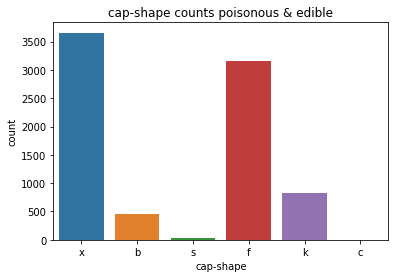

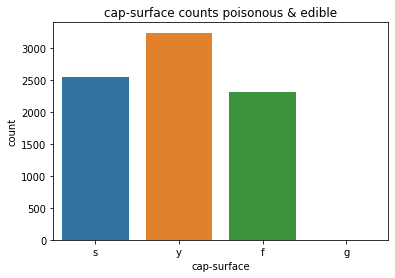

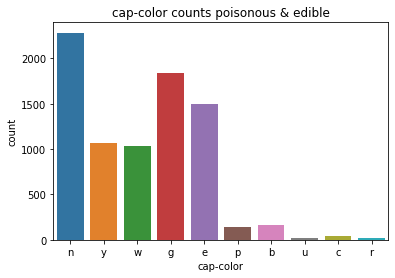

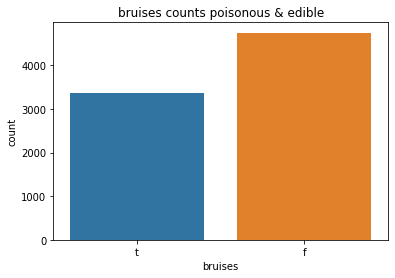

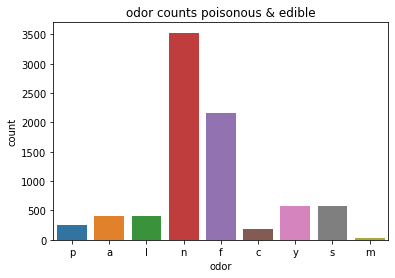

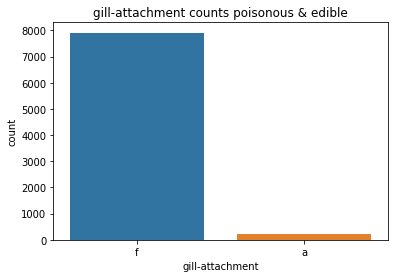

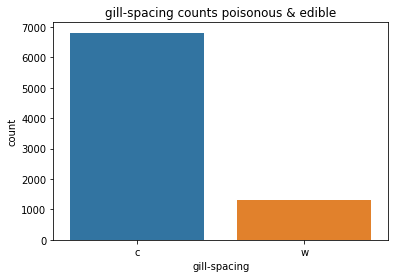

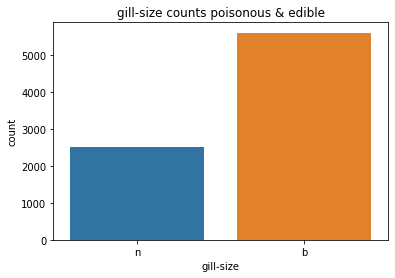

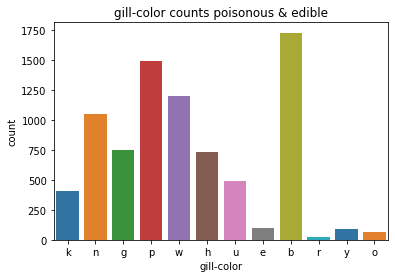

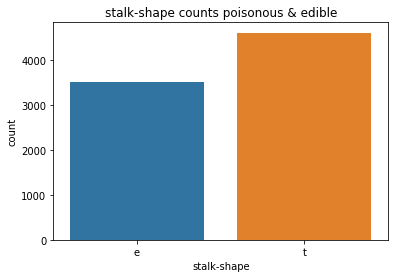

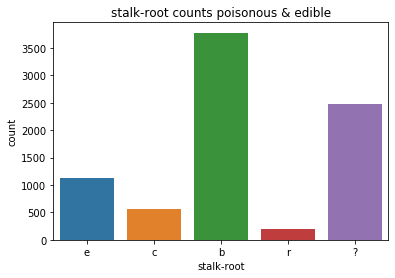

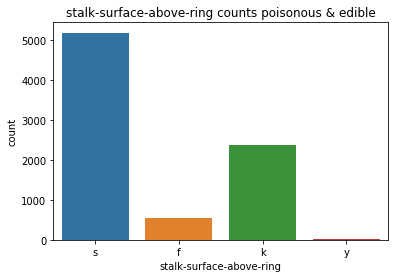

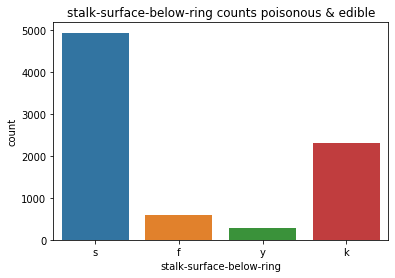

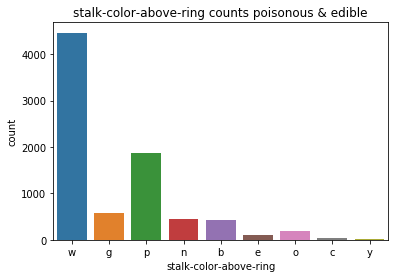

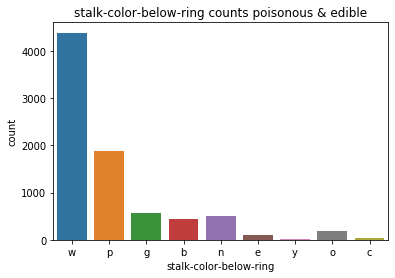

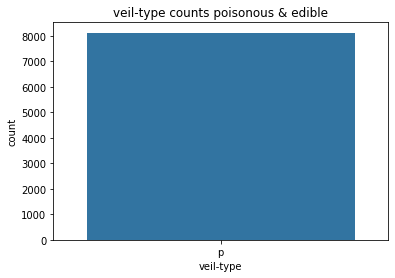

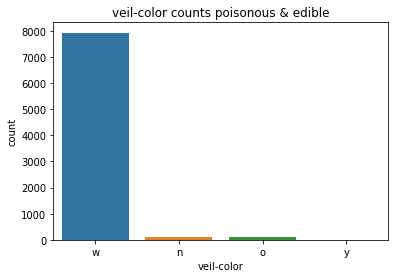

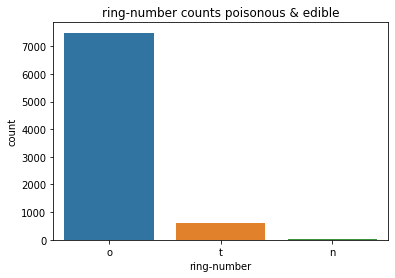

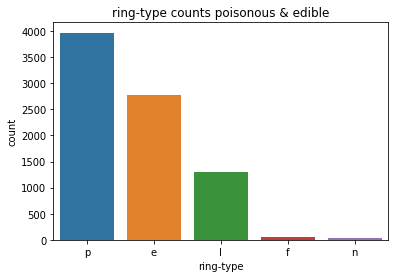

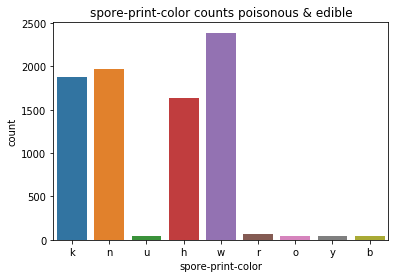

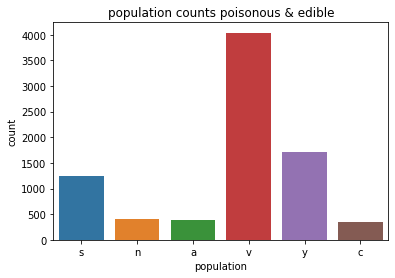

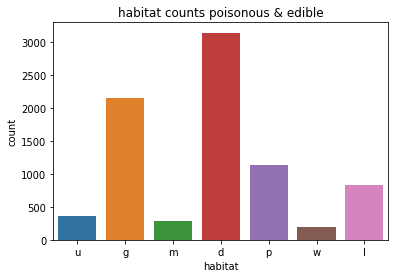

In [12]:
for x in cat_cols:
    plot_counts(data, x, 'poisonous & edible')

In [14]:
# function to plot all categorical variables against target
def plot_cats(df, cat, target):
    fig, ax = plt.subplots()
    ax = sns.countplot(x=cat, hue=target, data=df)
    ax.set_title(f'Count Poisonous VS Edible BY {cat}')

# visualizations

In [108]:
plt.close(fig='plt')
plt.cla()
plt.clf();

<Figure size 432x288 with 0 Axes>

<ipython-input-14-3e16ab0d9456>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


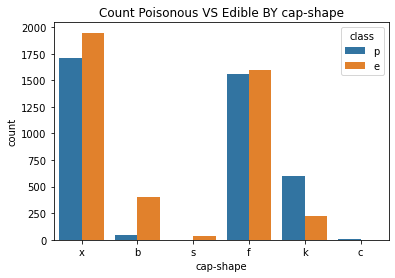

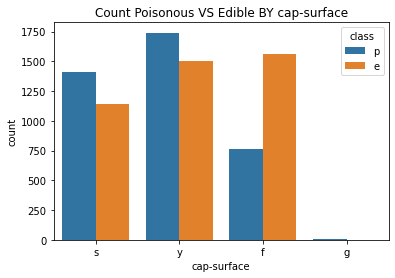

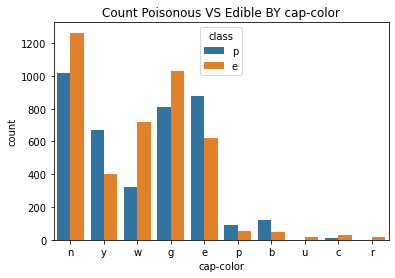

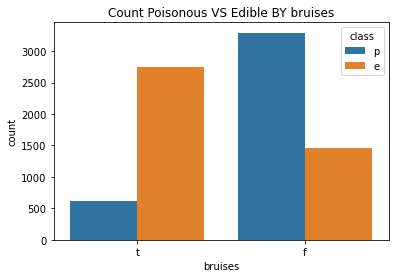

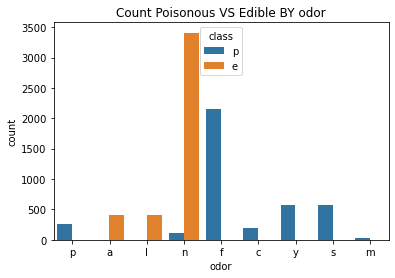

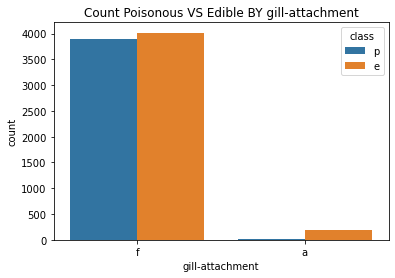

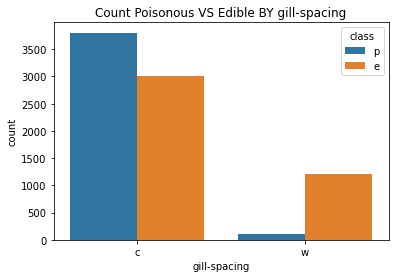

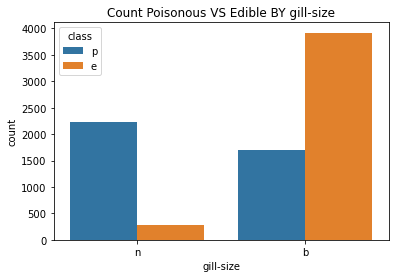

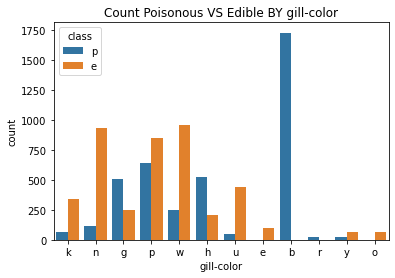

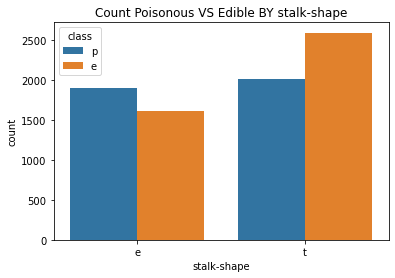

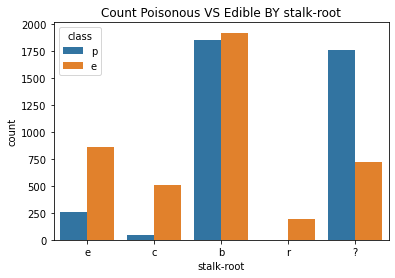

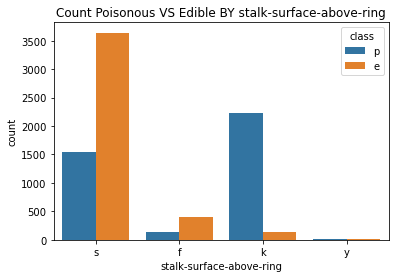

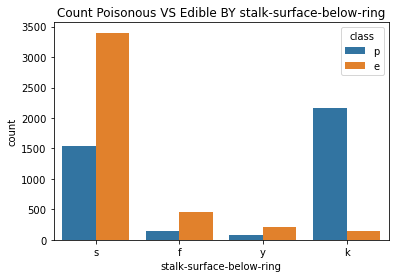

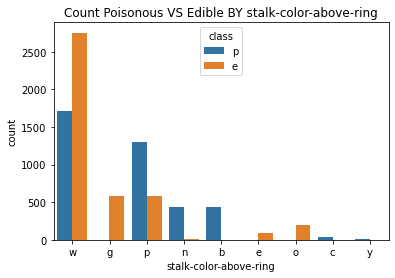

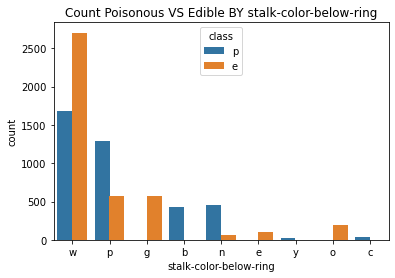

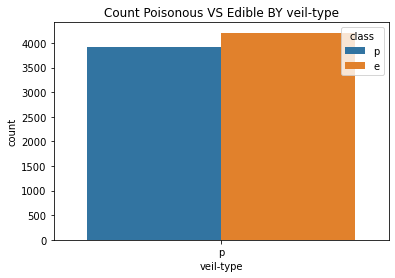

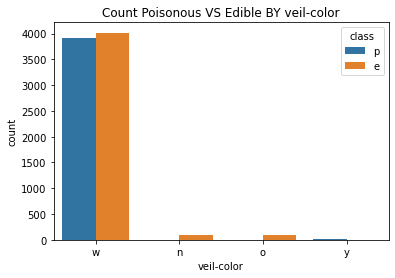

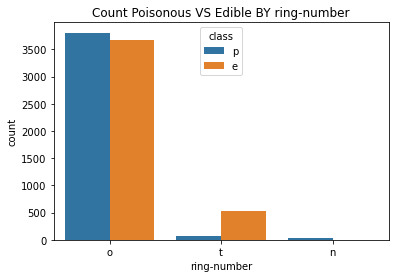

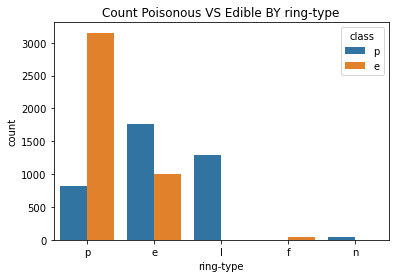

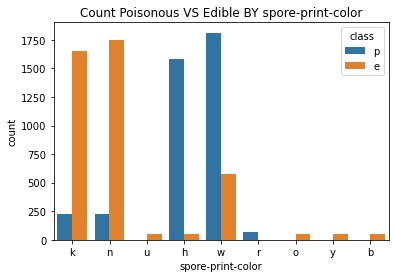

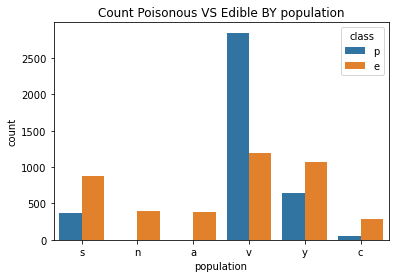

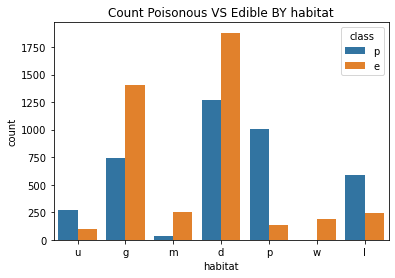

In [15]:
for x in cat_cols:
    plot_cats(data, x, 'class')

In [109]:
data['veil-type'].describe()

count     8124
unique       1
top          p
freq      8124
Name: veil-type, dtype: object

In [111]:
cat_cols.remove('veil-type')
cat_cols.remove('bruises')

In [119]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [120]:
# drop due to fact that there is no info gained from category, column had missing values or research on bruising inconclusive
data.drop(columns=['veil-type', 'bruises', 'stalk-root'], inplace=True)

# assess data balance and look at poisonous and edible data separately

In [18]:
# create poisonous only df
p_df = data[data['class'] == "p"]
#create edible only df
e_df = data[data['class'] == "e"]

<ipython-input-10-749685cf6f15>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


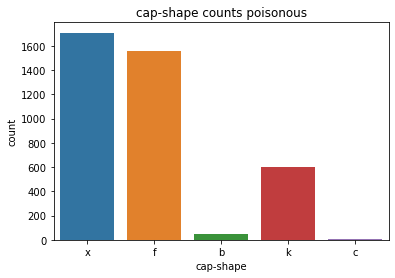

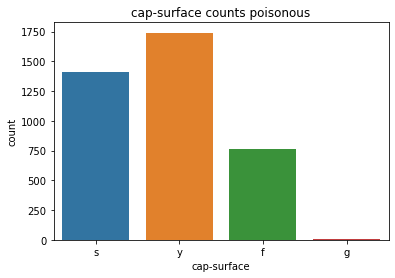

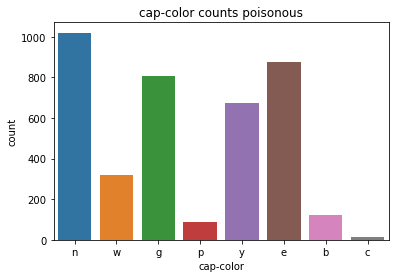

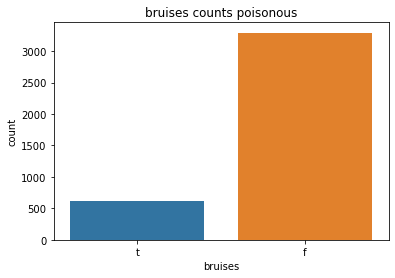

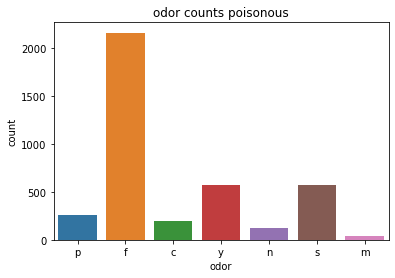

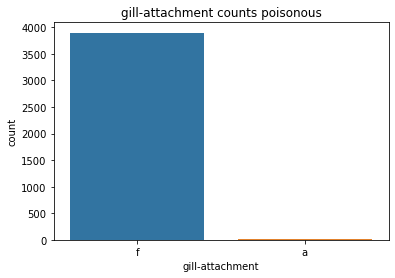

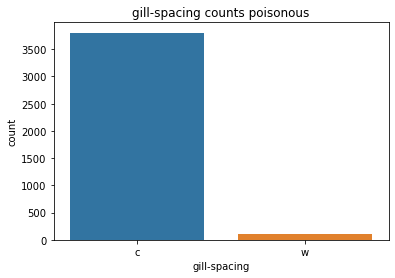

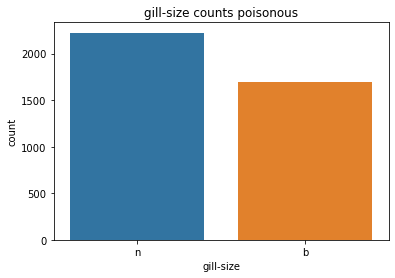

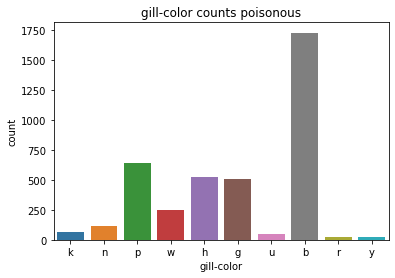

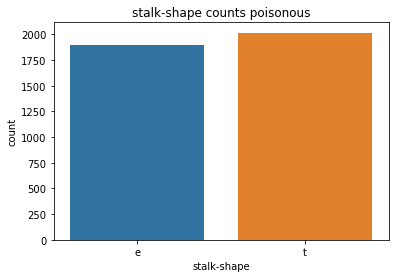

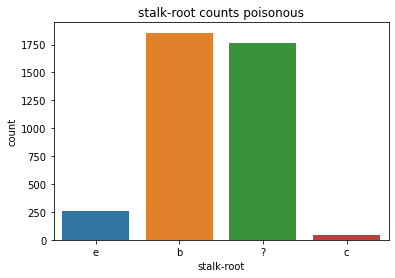

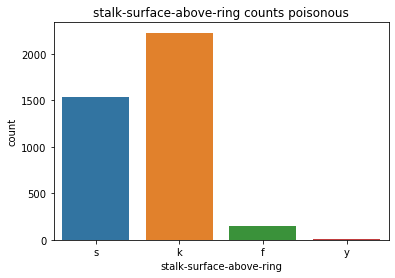

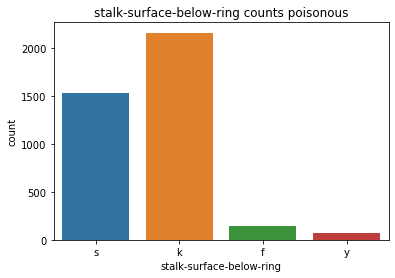

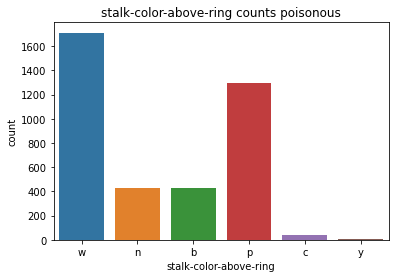

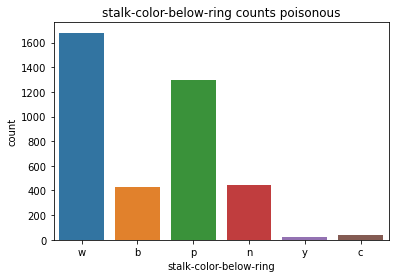

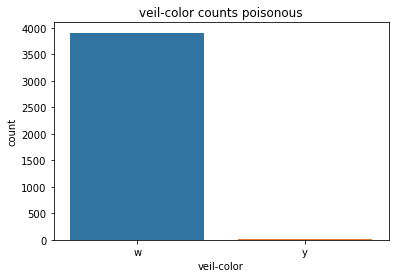

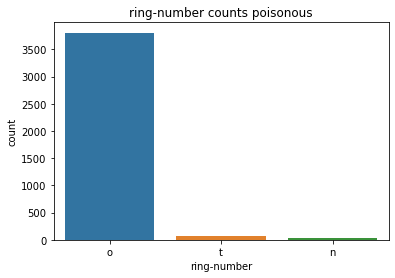

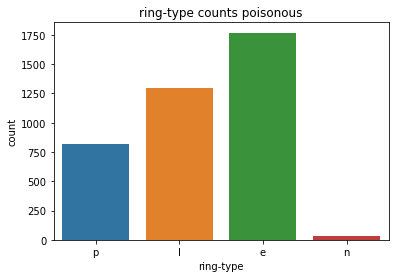

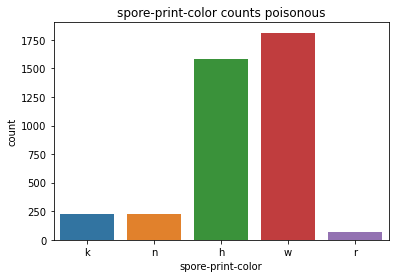

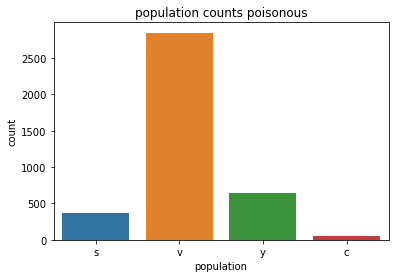

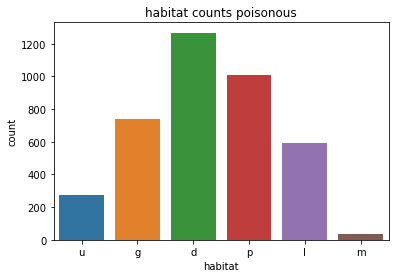

In [27]:
for x in cat_cols:
    plot_counts(p_df, x, 'poisonous')

<ipython-input-10-749685cf6f15>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


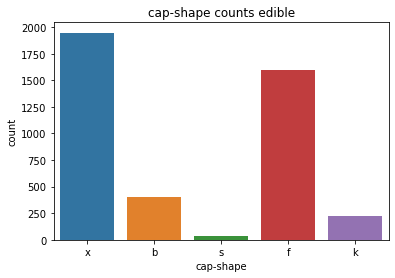

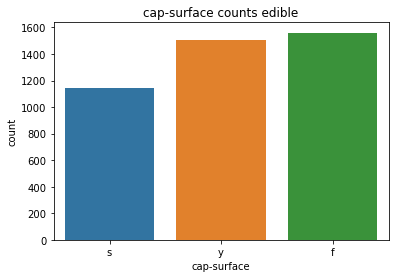

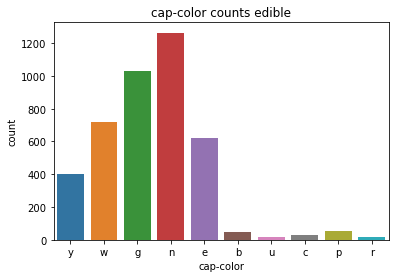

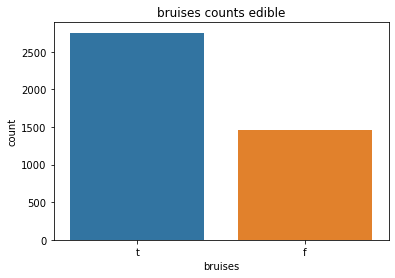

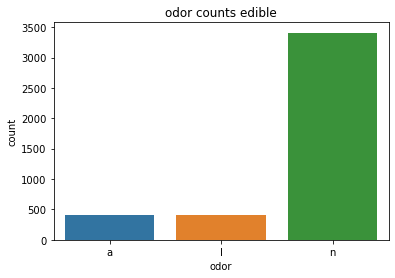

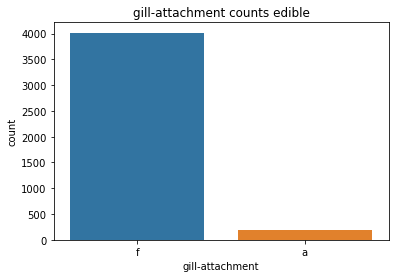

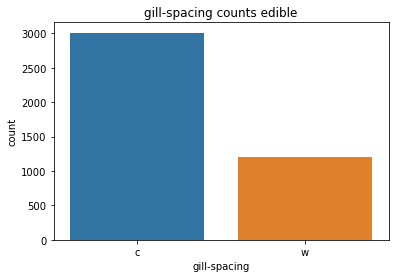

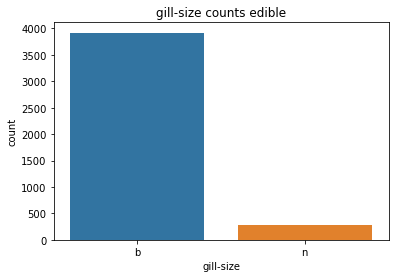

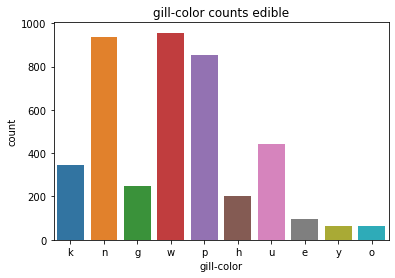

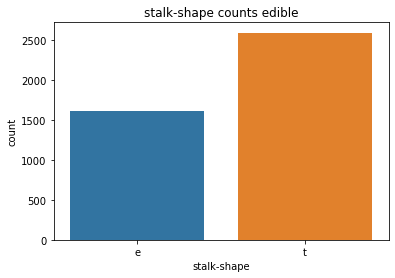

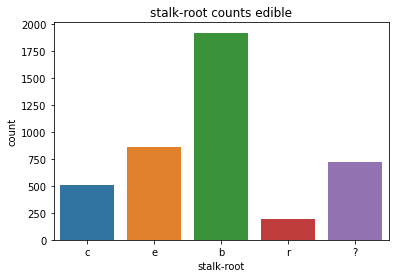

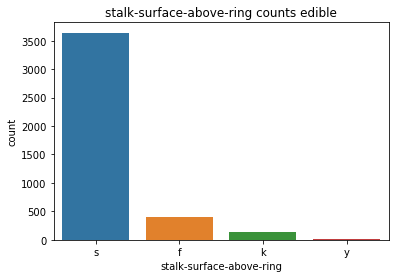

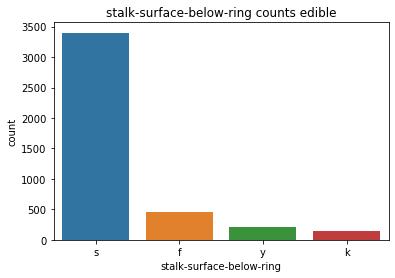

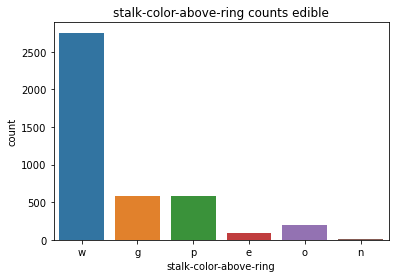

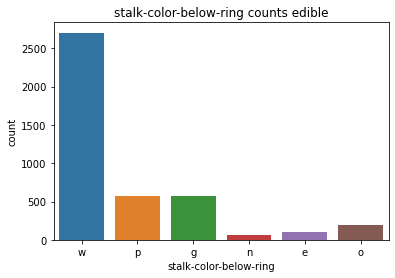

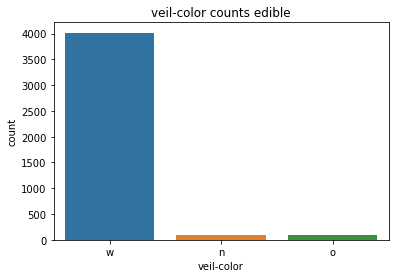

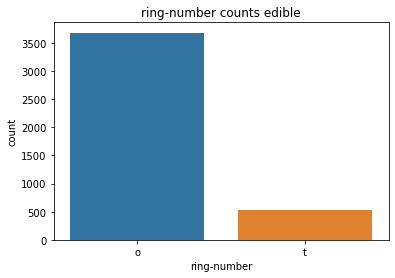

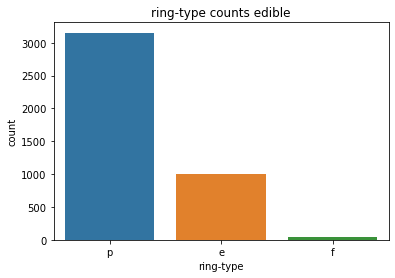

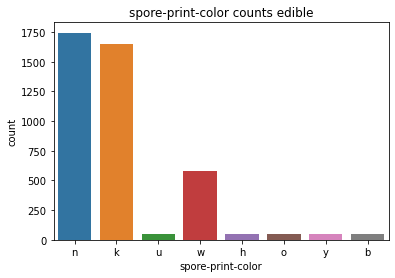

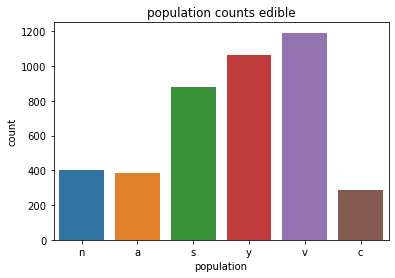

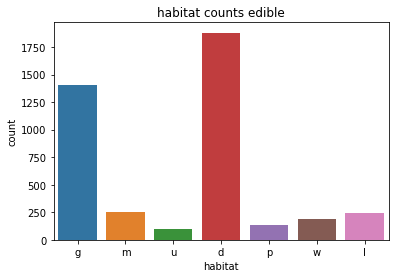

In [28]:
for x in cat_cols:
    plot_counts(e_df, x, 'edible')

In [29]:
p_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916
unique,1,5,4,8,2,7,2,2,2,10,...,4,4,6,6,2,3,4,5,4,6
top,p,x,y,n,f,f,f,c,n,b,...,k,k,w,w,w,o,e,w,v,d
freq,3916,1708,1740,1020,3292,2160,3898,3804,2224,1728,...,2228,2160,1712,1680,3908,3808,1768,1812,2848,1268


In [30]:
e_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
unique,1,5,3,10,2,3,2,2,2,10,...,4,4,6,6,3,2,3,8,6,7
top,e,x,f,n,t,n,f,c,b,w,...,s,s,w,w,w,o,p,n,v,d
freq,4208,1948,1560,1264,2752,3408,4016,3008,3920,956,...,3640,3400,2752,2704,4016,3680,3152,1744,1192,1880


# process X and y data

In [121]:
target = data['class']

## label encode categorical variables

In [122]:
features = data.copy()
features.drop(columns=['class'], inplace=True)
features = features.astype('category')

In [123]:
le = LabelEncoder()
le_df = features.apply(le.fit_transform)   

## feature selection using variance

In [78]:
le_df

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [62]:
le_df.var()

class                        0.249708
cap-shape                    2.573872
cap-surface                  1.512586
cap-color                    6.481204
odor                         4.425676
gill-attachment              0.025184
gill-spacing                 0.135432
gill-size                    0.213624
gill-color                  12.534142
stalk-shape                  0.245513
stalk-root                   1.125946
stalk-surface-above-ring     0.386212
stalk-surface-below-ring     0.456941
stalk-color-above-ring       3.616643
stalk-color-below-ring       3.637761
veil-color                   0.058888
ring-number                  0.073476
ring-type                    3.246022
spore-print-color            5.677084
population                   1.567709
habitat                      2.958316
dtype: float64

In [36]:
X_vf = le_df.filter(['gill-color','cap_color',
                     'odor', 'stalk-color-below-ring', 
                     'spore-print-color'], axis=1) 

In [75]:
le_df.dtypes

cap-shape                   int32
cap-surface                 int32
cap-color                   int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [37]:
ohe = OneHotEncoder()

In [38]:
X_vf_ohe = ohe.fit_transform(X_vf)

In [39]:
le_df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


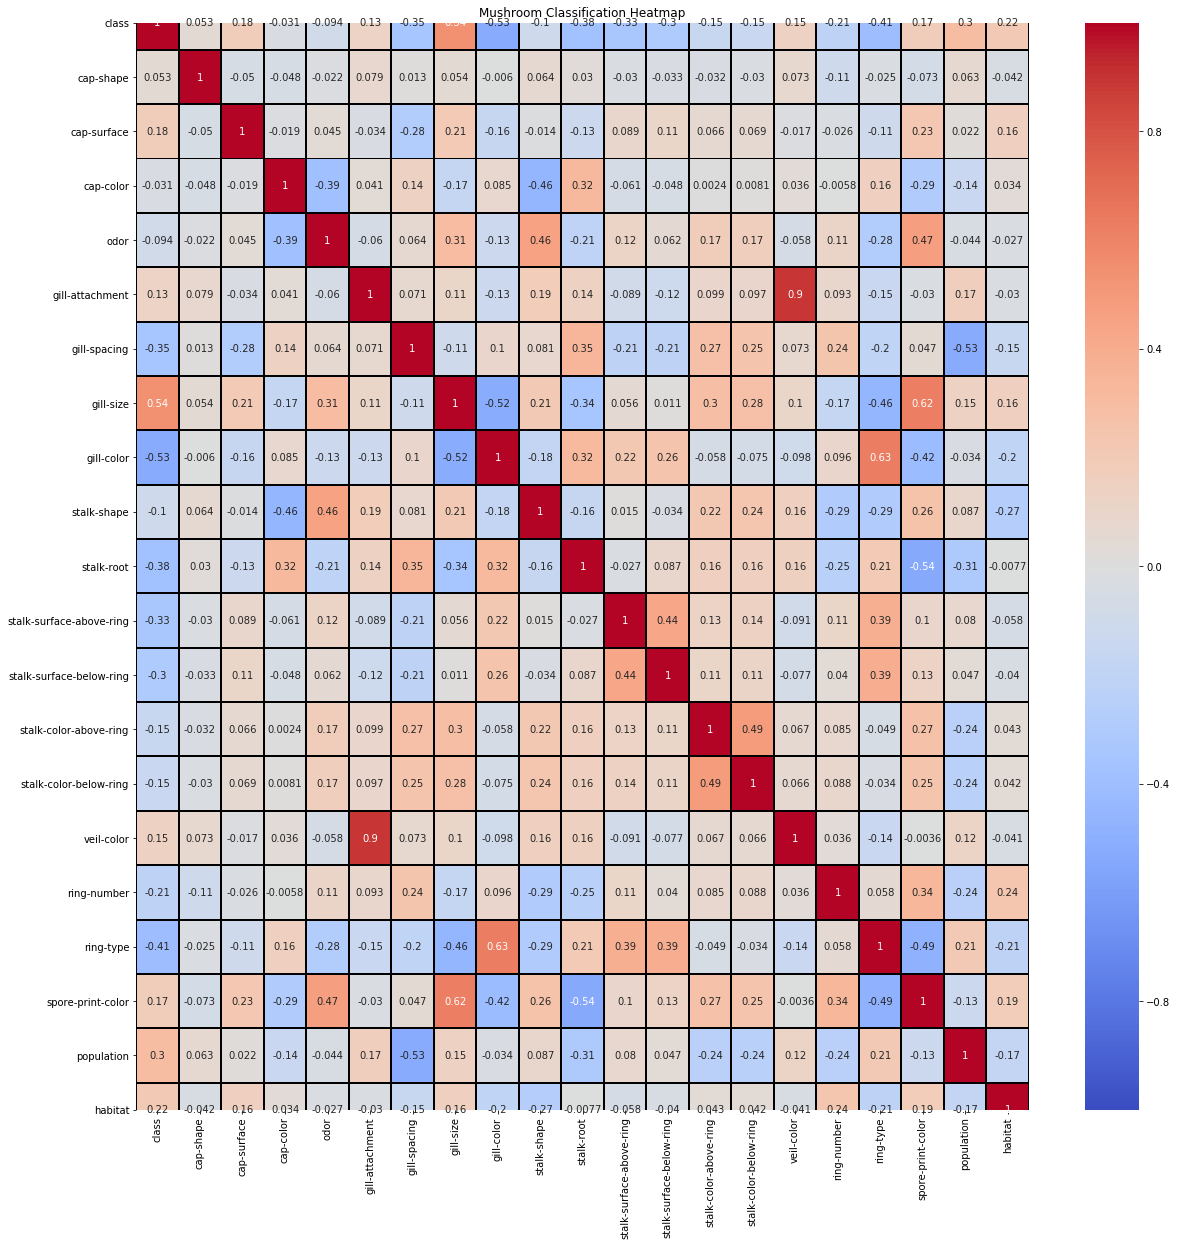

In [63]:
#heat map to assess correlation/collinearity
fig, ax = plt.subplots(figsize=(20, 20))

    
sns.heatmap(le_df.corr(), annot = True,  fmt='.2g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=1, linecolor='black')
ax.set_title('Mushroom Classification Heatmap')
plt.show() 

## define target variable, 1=poisonous, 0=edible

In [64]:
y = le_df['class']

## define feature variables

In [65]:
le_df.drop(columns=['class'], inplace=True)

In [73]:
le_df

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


## one hot encode X categorical variables

In [81]:
ohe = OneHotEncoder(drop='first') 

In [85]:
onehot = OneHotEncoder(categories='auto', drop='if_binary')
onehot.fit_transform(le_df)

onehot.categories_

ValueError: Wrong input for parameter `drop`. Expected 'first', None or array of objects, got <class 'str'>

In [45]:
X = ohe.transform(le_df)

In [46]:
X.shape

(8124, 95)

In [47]:
le_df.shape

(8124, 21)

In [48]:
y.shape

(8124,)

In [49]:
X_ohe = pd.DataFrame(X)

In [50]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

## feature selection using correlation


In [125]:
def covar_selector(X, y ,num_feats):
    covar_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        covar = np.cov(X[i], y)[0, 1]
        covar_list.append(covar)
    # replace NaN with 0
    covar_list = [0 if np.isnan(i) else i for i in covar_list]
    # feature name
    covar_feature = X.iloc[:,np.argsort(np.abs(covar_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    covar_support = [True if i in covar_feature else False for i in feature_name]
    return covar_support, covar_feature, covar_list
    covar_support, covar_feature = covar_selector(X, y, num_feats)
    print(str(len(covar_feature)), 'selected features')
    print(covar_list)

In [126]:
def var_selector(X, y ,num_feats):
    var_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        var = np.var(X[i])
        var_list.append(var)
    # replace NaN with 0
    var_list = [0 if np.isnan(i) else i for i in var_list]
    # feature name
    var_feature = X.iloc[:,np.argsort(np.abs(var_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    var_support = [True if i in var_feature else False for i in feature_name]
    return var_support, var_feature, var_list
    var_support, var_feature = var_selector(X, y, num_feats)
    print(str(len(var_feature)), 'selected features')
    print(var_list)

In [143]:
def cor_selector(X, y ,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature, cor_list
    cor_support, cor_feature = cor_selector(X, y, num_feats)
    print(str(len(cor_feature)), 'selected features')
    print(cor_list)

In [144]:
cor_df

NameError: name 'cor_df' is not defined

In [128]:
covar_selector(le_df, y, 10)

([False,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True],
 ['stalk-surface-above-ring',
  'cap-surface',
  'gill-size',
  'stalk-color-below-ring',
  'stalk-color-above-ring',
  'habitat',
  'population',
  'spore-print-color',
  'ring-type',
  'gill-color'],
 [0.0424502326459879,
  0.10966883913643577,
  -0.03992577682872179,
  -0.09834612624109534,
  0.010245721660198255,
  -0.06406764339006643,
  0.12472538026706924,
  -0.9386482923524471,
  -0.025260075380900273,
  -0.10390710574789536,
  -0.10093168106584821,
  -0.14635151944078903,
  -0.13984689970725211,
  0.017600393458211693,
  -0.029036575938883532,
  -0.3707216223144256,
  0.20474277408769265,
  0.18688004282749565,
  0.18666231699922872])

In [129]:
var_selector(le_df, y, 10)

([True,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True],
 ['population',
  'cap-shape',
  'habitat',
  'ring-type',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'odor',
  'spore-print-color',
  'cap-color',
  'gill-color'],
 [2.5735549984593793,
  1.5124002384507393,
  6.4804064814188544,
  4.4251312921503985,
  0.025181147167209577,
  0.1354155833230908,
  0.21359814068545138,
  12.532598793055257,
  0.2454830482033649,
  0.38616413585486026,
  0.4568848044866364,
  3.6161975834438196,
  3.637312934595018,
  0.05888104154196851,
  0.07346687641410427,
  3.245622443460678,
  5.67638530400651,
  1.5675159110595227,
  2.957951360024979])

In [130]:
cor_selector(le_df, y, 10)

([False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  True],
 ['cap-surface',
  'ring-number',
  'habitat',
  'population',
  'stalk-surface-below-ring',
  'stalk-surface-above-ring',
  'gill-spacing',
  'ring-type',
  'gill-color',
  'gill-size'],
 [0.0529505644343625,
  0.17844612596167966,
  -0.03138408686213128,
  -0.0935516440240368,
  0.12919986026788413,
  -0.34838678518427413,
  0.5400243574330169,
  -0.5305661908665225,
  -0.1020190170165609,
  -0.33459274937291544,
  -0.29880055219490287,
  -0.15400272516021538,
  -0.14673028309667363,
  0.14514159151011857,
  -0.2143664719779926,
  -0.41177138593935275,
  0.17196097382990086,
  0.29868553597328157,
  0.2171792776428237])

In [146]:
X_vf = le_df.filter(['population',
  'cap-shape',
  'habitat',
  'ring-type',
  'stalk-color-above-ring',
  'stalk-color-below-ring',
  'odor',
  'spore-print-color',
  'cap-color',
  'gill-color'], axis=1)

In [157]:
ohe=OneHotEncoder(categories='auto',  sparse=False)

In [158]:
XV_ohe = ohe.fit_transform(X_vf)

In [159]:
XV_ohe.shape

(8124, 82)

In [160]:
X_cf = le_df.filter(['cap-surface',
  'ring-number',
  'habitat',
  'population',
  'stalk-surface-below-ring',
  'stalk-surface-above-ring',
  'gill-spacing',
  'ring-type',
  'gill-color',
  'gill-size'], axis=1) 

In [161]:
XC_ohe = ohe.fit_transform(X_cf)

In [162]:
X_cv = le_df.filter(['stalk-surface-above-ring',
  'cap-surface',
  'gill-size',
  'stalk-color-below-ring',
  'stalk-color-above-ring',
  'habitat',
  'population',
  'spore-print-color',
  'ring-type',
  'gill-color'], axis=1) 

In [163]:
XCV_ohe = ohe.fit_transform(X_cv)

In [164]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore') 
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:

def cv_score(model, x_train, y_train, y_test):
    #CV scores, 3 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=3)
    #Prediction and accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Accuracy: %0.2f" % (accuracy_test))
    

#display confusion matrix 
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
#Visualize the confusion matrix
def vis_cm(model, X, y):
    score = model.score(X, y)
    y_pred = model.predict(X, y)
    confusion = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)

# prep data for model

In [211]:
# split ohe data
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=42,
                                                     test_size=.2)

In [96]:
# split label encoded data
X_train2, X_test2, y_train2, y_test2 = train_test_split(le_df, y, random_state=42,
                                                     test_size=.2)

In [170]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(XC_ohe, y, random_state=42,
                                                     test_size=.2)

In [171]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(XV_ohe, y, random_state=42,
                                                     test_size=.2)

In [172]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(XCV_ohe, y, random_state=42,
                                                     test_size=.2)

In [106]:
# normalize feature data for label encoded data
ss = StandardScaler()
X_ts = ss.fit_transform(X_train2)
X_tests = ss.transform(X_test2)

In [107]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [157]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        'max_features': [2, 3, 5, 7, 10],
        'min_samples_leaf':[2, 5, 10],
        'max_depth':[5, 8, 10],
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
 
},
    
    'clf_svm' : {
        'kernel': ['rbf', 'linear'], 
        'degree' : [1, 2, 3],
        'C': [.01, .05, 1, 10, ],
},
    


                                                               }

In [126]:
def fit_search(X_data, y_data, X_test, y_test):
    for name in models.keys():
        clf = models[name]
        clf_params = params[name]
        gscv = GridSearchCV(estimator=clf, param_grid=clf_params, 
                                cv=kf, return_train_score=True, refit=True)
        gscv.fit(X_data, y_data)
        sel_model = gscv.best_estimator_
        print("best parameters are: {}".format(sel_model))
        visualizer = ClassificationReport(gscv.best_estimator_, classes=['edible', 'poisonous'], cmap="PuOr", size=(300, 200))
        visualizer.fit(X_train, y_train)  
        visualizer.score(X_test, y_test)
        visualizer.poof()  
        y_pred = sel_model.predict(X_test)
        print(classification_report(y_test, y_pred))
       

        cm = ConfusionMatrix(sel_model, classes=['edible', 'poisonous'], cmap="RdBu", size=(200, 200))
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.show()

# full dataset ohe processed

best parameters are: RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=2,
                       n_jobs=-1)


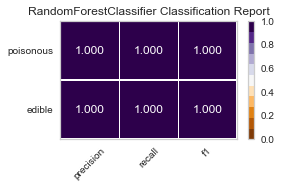

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



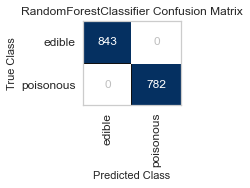

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


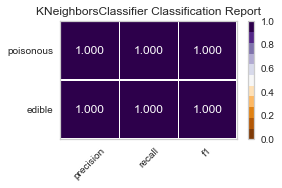

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



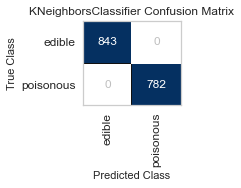

best parameters are: SGDClassifier()


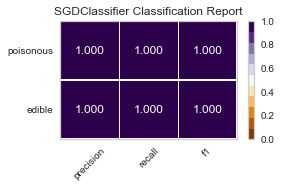

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



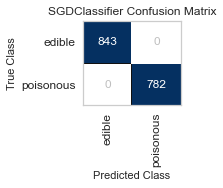

best parameters are: SVC(C=1, degree=1, kernel='linear')


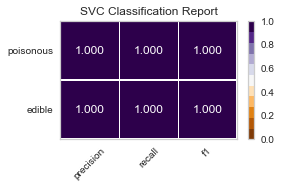

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



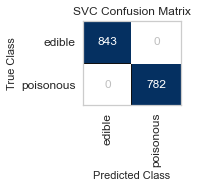

In [158]:
fit_search(X_train, y_train, X_test, y_test)

In [2]:
rf_model = RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=2,
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred = rf_model.predict(X_test)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
#print(ClassificationReport(y_test, y_pred, target_names=['edible' , 'poisonous']))

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [214]:
from yellowbrick.cluster import InterclusterDistance

In [216]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train, y_train)

# Predict on test set
y_pred = kn_model.predict(X_test)
print(kn_model.score(X_train, y_train))
print(kn_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))


1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
from sklearn.model_selection import cross_val_predict

In [469]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train, y_train)
# Predict on test set
y_pred = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [514]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)
# Predict on test set
y_pred = sgd_model.predict(X_test)
print(sgd_model.score(X_train, y_train))
print(sgd_model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [515]:
from numpy import where

# model fit label encoded data

best parameters are: RandomForestClassifier(max_depth=8, n_jobs=-1)


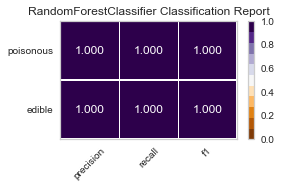

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



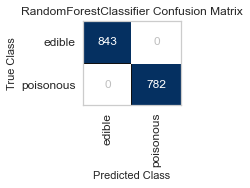

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


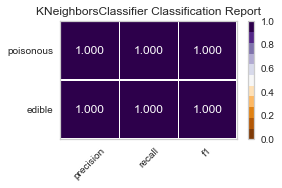

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



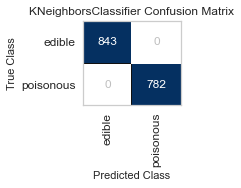

best parameters are: SGDClassifier()


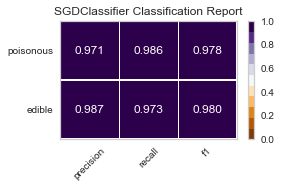

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       843
           1       0.97      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



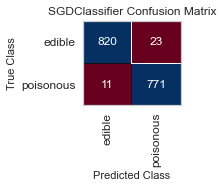

best parameters are: SVC(C=1, degree=1)


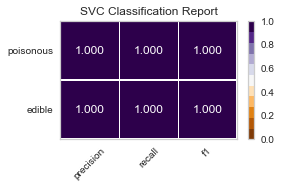

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



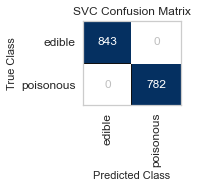

In [135]:
fit_search(X_ts, y_train2, X_tests, y_test2)

In [209]:
rf_model = RandomForestClassifier(max_depth=8, n_jobs=-1)
rf_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = rf_model.predict(X_tests)
print(rf_model.score(X_ts, y_train2))
print(rf_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

1.0
1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Feature: 0, Score: 0.00270
Feature: 1, Score: 0.00718
Feature: 2, Score: 0.01207
Feature: 3, Score: 0.04806
Feature: 4, Score: 0.15503
Feature: 5, Score: 0.00363
Feature: 6, Score: 0.06136
Feature: 7, Score: 0.10566
Feature: 8, Score: 0.14148
Feature: 9, Score: 0.02891
Feature: 10, Score: 0.05160
Feature: 11, Score: 0.04842
Feature: 12, Score: 0.04056
Feature: 13, Score: 0.01683
Feature: 14, Score: 0.01629
Feature: 15, Score: 0.00047
Feature: 16, Score: 0.01535
Feature: 17, Score: 0.06927
Feature: 18, Score: 0.07946
Feature: 19, Score: 0.06290
Feature: 20, Score: 0.03276


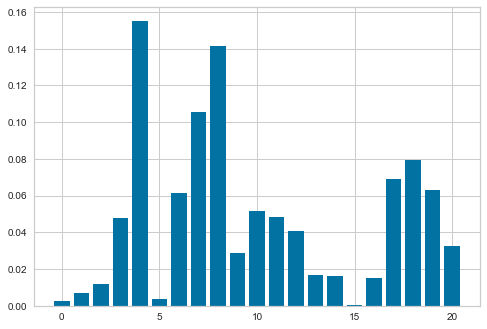

In [208]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [472]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = kn_model.predict(X_tests)
print(kn_model.score(X_ts, y_train2))
print(kn_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [473]:
svc_model = SVC(C=10, degree=1)
svc_model.fit(X_ts, y_train2)
# Predict on test set
y_pred = svc_model.predict(X_tests)
print(svc_model.score(X_ts, y_train2))
print(svc_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.9969226034774581
0.9975384615384615
[[843   0]
 [  4 778]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [474]:
sgd_model = SGDClassifier()
sgd_model.fit(X_ts, y_train2)
sgd_model.score(X_tests, y_test2)
# Predict on test set
y_pred = sgd_model.predict(X_tests)
print(sgd_model.score(X_ts, y_train2))
print(sgd_model.score(X_tests, y_test2))
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred, target_names=['edible' , 'poisonous']))

0.7978150484689952
0.8043076923076923
[[715 128]
 [190 592]]
              precision    recall  f1-score   support

      edible       0.79      0.85      0.82       843
   poisonous       0.82      0.76      0.79       782

    accuracy                           0.80      1625
   macro avg       0.81      0.80      0.80      1625
weighted avg       0.81      0.80      0.80      1625



# corcoeff feature data 

In [189]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        #'max_features': [2, 3, 5, 7, 10],
        'criterion': ['entropy'],
        'max_depth':[5, 7, 8, 10, 12],
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
        'loss':['hinge', 'log',],
},
    
    'clf_svm' : {
        'kernel': ['rbf',], 
        'degree' : [1, 2,],
        'C': [.01, .05, 1, 10, ],
},
    
}

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1)


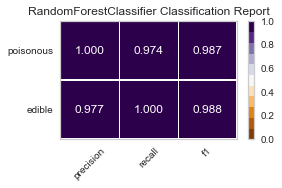

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



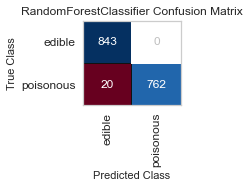

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


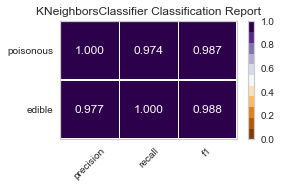

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



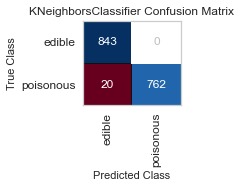

best parameters are: SGDClassifier()


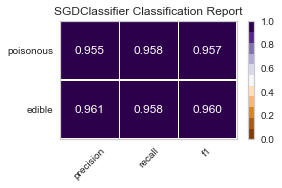

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       843
           1       0.96      0.96      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



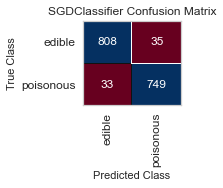

best parameters are: SVC(C=1, degree=1)


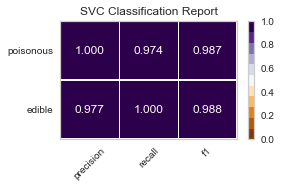

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       843
           1       1.00      0.97      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



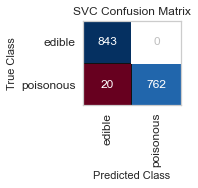

In [190]:
fit_search(X_train3, y_train3, X_test3, y_test3)

In [529]:
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1, criterion='gini')
rf_model.fit(X_train3, y_train3)
# Predict on test set
y_pred = rf_model.predict(X_test3)
print(rf_model.score(X_train3, y_train3))
print(rf_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [475]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train3, y_train3)

# Predict on test set
y_pred = kn_model.predict(X_test3)
print(kn_model.score(X_train3, y_train3))
print(kn_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [476]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train3, y_train3)
# Predict on test set
y_pred = svc_model.predict(X_test3)
print(svc_model.score(X_train3, y_train3))
print(svc_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9718418218187413
0.9747692307692307
[[843   0]
 [ 41 741]]
              precision    recall  f1-score   support

      edible       0.95      1.00      0.98       843
   poisonous       1.00      0.95      0.97       782

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [477]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train3, y_train3)
sgd_model.score(X_test3, y_test3)
# Predict on test set
y_pred = sgd_model.predict(X_test3)
print(sgd_model.score(X_train3, y_train3))
print(sgd_model.score(X_test3, y_test3))
print(confusion_matrix(y_test3, y_pred))
print(classification_report(y_test3, y_pred, target_names=['edible' , 'poisonous']))

0.9583012771195568
0.955076923076923
[[816  27]
 [ 46 736]]
              precision    recall  f1-score   support

      edible       0.95      0.97      0.96       843
   poisonous       0.96      0.94      0.95       782

    accuracy                           0.96      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.96      0.96      1625



# features selected by var

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)


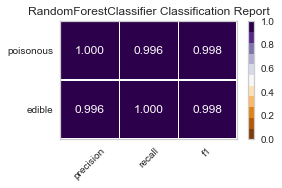

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



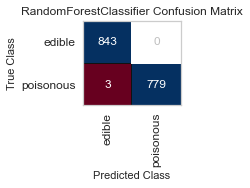

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


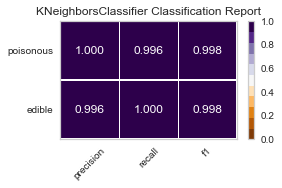

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



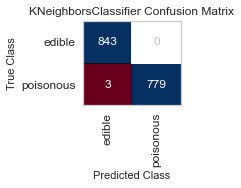

best parameters are: SGDClassifier()


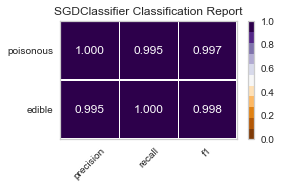

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      0.99      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



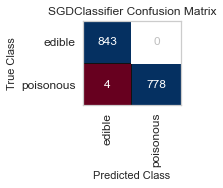

best parameters are: SVC(C=1, degree=1)


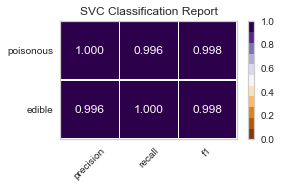

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



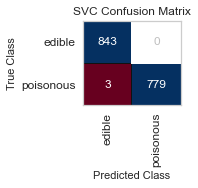

In [191]:
fit_search(X_train4, y_train4, X_test4, y_test4)

In [198]:
rf_model = RandomForestClassifier(max_depth=10, n_jobs=-1)
rf_model.fit(X_train4, y_train4)
# Predict on test set
y_pred = rf_model.predict(X_test4)
print(rf_model.score(X_train4, y_train4))
print(rf_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9979996922603478
0.9981538461538462
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Feature: 0, Score: 0.00287
Feature: 1, Score: 0.03268
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.08286
Feature: 4, Score: 0.00028
Feature: 5, Score: 0.00413
Feature: 6, Score: 0.00666
Feature: 7, Score: 0.00586
Feature: 8, Score: 0.00194
Feature: 9, Score: 0.01090
Feature: 10, Score: 0.01030
Feature: 11, Score: 0.00071
Feature: 12, Score: 0.00064
Feature: 13, Score: 0.00440
Feature: 14, Score: 0.00791
Feature: 15, Score: 0.00198
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.01334
Feature: 18, Score: 0.00672
Feature: 19, Score: 0.00261
Feature: 20, Score: 0.02782
Feature: 21, Score: 0.12958
Feature: 22, Score: 0.02073
Feature: 23, Score: 0.00017
Feature: 24, Score: 0.24554
Feature: 25, Score: 0.04280
Feature: 26, Score: 0.01698
Feature: 27, Score: 0.02504
Feature: 28, Score: 0.06943
Feature: 29, Score: 0.03668
Feature: 30, Score: 0.02730
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.01450
Feature: 33, Score: 0.00072
Feature: 34, Score: 0.05960
Feature: 35, Score: 0.00000
Fe

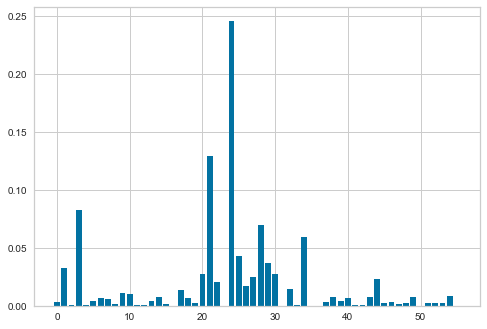

In [200]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [201]:
av_prec_RF = average_precision_score(y_test4, y_pred)
RF_precision, RF_recall, RF_thresholds = precision_recall_curve(y_test4, y_pred)
RF_f1 = f1_score(y_test4, y_pred)
RF_pauc = auc(RF_recall, RF_precision)
print('RF Classifier: f1=%.3f auc=%.3f' % (RF_f1, RF_pauc))

RF Classifier: f1=0.998 auc=0.999


In [203]:
kn_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
kn_model.fit(X_train4, y_train4)

# Predict on test set
y_pred = kn_model.predict(X_test4)
print(kn_model.score(X_train4, y_train4))
print(kn_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9979996922603478
0.9981538461538462
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [545]:
av_prec_KNN = average_precision_score(y_test4, y_pred)
KNN_precision, KNN_recall, KNN_thresholds = precision_recall_curve(y_test4, y_pred)
KNN_f1 = f1_score(y_test4, y_pred)
KNN_pauc = auc(KNN_recall, KNN_precision)
print('KNN Classifier: f1=%.3f auc=%.3f' % (KNN_f1, KNN_pauc))

KNN Classifier: f1=0.997 auc=0.999


In [205]:
svc_model = SVC(C=1, degree=1)
svc_model.fit(X_train4, y_train4)
# Predict on test set
y_pred = svc_model.predict(X_test4)
print(svc_model.score(X_train4, y_train4))
print(svc_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9979996922603478
0.9981538461538462
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [547]:
av_prec_SVC = average_precision_score(y_test4, y_pred)
SVC_precision, SVC_recall, SVC_thresholds = precision_recall_curve(y_test4, y_pred)
SVC_f1 = f1_score(y_test4, y_pred)
SVC_pauc = auc(SVC_recall, SVC_precision)
print('Voting Classifier: f1=%.3f auc=%.3f' % (SVC_f1, SVC_pauc))

Voting Classifier: f1=0.997 auc=0.999


In [194]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train4, y_train4)
sgd_model.score(X_test4, y_test4)
# Predict on test set
y_pred = sgd_model.predict(X_test4)
print(sgd_model.score(X_train4, y_train4))
print(sgd_model.score(X_test4, y_test4))
print(confusion_matrix(y_test4, y_pred))
print(classification_report(y_test4, y_pred, target_names=['edible' , 'poisonous']))

0.9964609939990767
0.9944615384615385
[[835   8]
 [  1 781]]
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [549]:
av_prec_SGD = average_precision_score(y_test4, y_pred)
SGD_precision, SGD_recall, SGD_thresholds = precision_recall_curve(y_test4, y_pred)
SGD_f1 = f1_score(y_test4, y_pred)
SGD_pauc = auc(SGD_recall, SGD_precision)
print('SGD Classifier: f1=%.3f auc=%.3f' % (SGD_f1, SGD_pauc))

SGD Classifier: f1=0.997 auc=0.999


# features selected by covariance

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1)


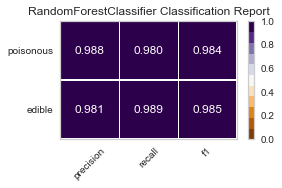

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



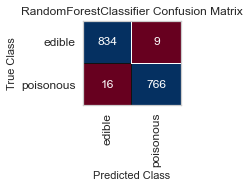

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


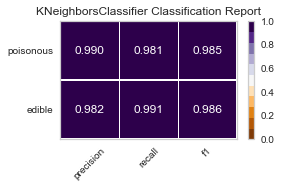

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



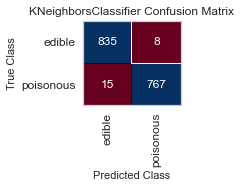

best parameters are: SGDClassifier()


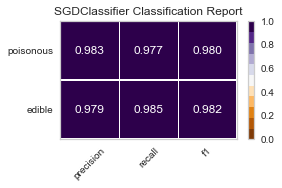

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       843
           1       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



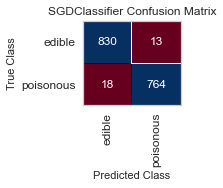

best parameters are: SVC(C=10, degree=1)


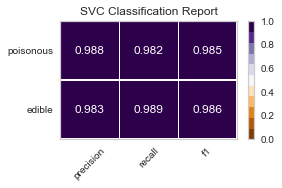

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



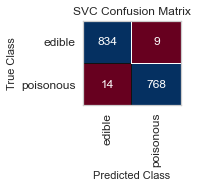

In [192]:
fit_search(X_train5, y_train5, X_test5, y_test5)